In [ ]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def forward(self, inputs):
        return inputs.dot(self.weights) + self.bias # inputs@self.weights + bias

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [ ]:
n = Neuron(weights, bias)

In [ ]:
res = n.forward(inputs)
res

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [ ]:
class Linear:
    def __init__(self, weights, biases):
        self.weights = weights
        self.bias = biases
    def forward(self, inputs):
        return self.weights.mv(inputs) + self.bias #inputs.matmul

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.8]])

biases = torch.tensor([3.14, 2.71, 7.2])

In [ ]:
l = Linear(weights, biases)
res = l.forward(inputs)
res

tensor([ 4.8400,  0.1700, 10.1100])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
class LinearBatch:
    def __init__(self, weights, biases):
        self.weights = weights
        self.bias = biases

    def forward(self, inputs):
        return inputs.matmul(self.weights.T) + self.bias

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]]) #batch size×n_features
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.8]])#n_neurons×n_features

biases = torch.tensor([3.14, 2.71, 7.2])
layer = LinearBatch(weights, biases)

res = layer.forward(inputs)
res

tensor([[ 3.7900,  0.9200,  8.9100],
        [ 6.1400, -2.1000,  6.7600],
        [ 2.0400,  0.7610,  6.7820]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_neurons, n_features)  # n_neurons x n_features
        self.bias = torch.randn(n_neurons)  # n_neurons

    def forward(self, inputs):
        return inputs.matmul(self.weights.T) + self.bias

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])


n_features = 4
n_neurons = 5

layer = Linear(n_features, n_neurons)

res = layer.forward(inputs)
res

tensor([[ -7.8015,   1.1433,  -3.8936,   5.5906,   4.6373],
        [ -7.6014,  -5.6411,  -5.1274,   4.5223,   0.5805],
        [ -0.5360,   1.9297, -12.2359,   4.1541,   5.6592]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
l1 = Linear(n_features=4, n_neurons=5)

l2 = Linear(n_features=5, n_neurons=7)

res1 = l1.forward(inputs)
res2 = l2.forward(res1)

res2

tensor([[  0.3213,   8.6919,  -2.5663,  -5.2542,   1.5129,   5.2756,  -1.9417],
        [-10.6501,   7.8541,  13.8238,  23.4375,  -6.2836,  -1.1178,   5.6653],
        [ 12.7801,  18.0887, -31.4151, -28.9330,   7.6162,  14.4659,  -4.9994]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ReLU: #Вводит нелинейность, игнорирует отрицательные значения
    def forward(self, inputs):
        return torch.maximum(inputs, torch.tensor(0.0))

inputs = torch.randn(4, 3)

relu = ReLU()
res = relu.forward(inputs)
res

tensor([[1.2034, 0.0000, 0.0000],
        [1.2834, 0.1804, 0.0000],
        [0.5707, 0.7284, 0.0000],
        [0.0000, 0.0000, 0.0000]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

Превращает набор чисел в вероятность (каждое значение находится в диапазоне [0,1], и их сумма равна 1).
Когда используется: Для задач классификации на последнем слое нейронной сети, когда нужно предсказать вероятность принадлежности к одному из нескольких классов.

In [ ]:
class Softmax:
    def forward(self, inputs):
        exp = torch.exp(inputs)
        return exp / torch.sum(exp, dim=1, keepdim=True) #keepdim=True схраняет исходную размерность

inputs = torch.randn(4, 3)  #матрица 4x3
softmax = Softmax()
res = softmax.forward(inputs)
res

tensor([[0.1862, 0.4351, 0.3787],
        [0.0951, 0.5764, 0.3285],
        [0.0476, 0.6575, 0.2949],
        [0.3675, 0.4532, 0.1793]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

Сохраняет положительные значения такими же, как в ReLU, но добавляет экспоненциальный рост для отрицательных значений.

In [ ]:
class ELU:
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def forward(self, inputs):
        return torch.where(inputs >= 0, inputs, self.alpha * (torch.exp(inputs) - 1))

inputs = torch.randn(4, 3)
elu = ELU(alpha=1.0)
res = elu.forward(inputs)
res

tensor([[-0.8250,  0.0501,  1.1383],
        [-0.3670,  2.1264,  2.0147],
        [ 2.1714, -0.1558,  0.9750],
        [-0.5030,  0.7762,  1.7405]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class MSELoss:
    def forward(self, y_pred, y_true):
        mse = 1/(y_true.size()[0])*torch.sum((y_pred-y_true)**2)
        return mse

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y_p = torch.tensor([1.2,3.5,4.8])
y = torch.tensor([2, 3, 4])

In [ ]:
mse = MSELoss()
mse.forward(y_p,y)

tensor(0.5100)

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        return torch.matmul(inputs, self.weights) + self.biases

class CategoricalCrossentropyLoss:
    def forward(self, y_pred, y_true):
        return -1 * (y_true * torch.log(y_pred)).sum(1)

inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([1, 0, 0])

linear_layer = Linear(4, 3) #Слой с 3 нейронами

softmax = Softmax()
cce_loss = CategoricalCrossentropyLoss()
res = cce_loss.forward(softmax.forward(linear_layer.forward(inputs)), y)
print(f'CCE loss: {res}')

CCE loss: tensor([1.5260e-01, 8.9603e+00, 1.5227e-03])


2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)



In [ ]:
class MSELossL:

    def __init__(self, lambda_, layer, W=0.1):
        # <создать атрибут объекта alpha>
        self.lambda_ = lambda_
        self.layer = layer
        self.layer.W = W

    def data_loss(self, y_pred, y_true):
        # <подсчет первого слагаемого из формулы>
        return (y_true - y_pred) ** 2

    def reg_loss(self, layer):
        # используйте атрибуты объекта layer, в которых хранятся веса слоя
        #подсчет второго слагаемого из формулы
        return self.lambda_ * (layer.W ** 2)

    def forward(self, y_pred, y_true):
        return self.data_loss(y_pred, y_true) + self.reg_loss(self.layer)

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

linear_layer = Linear(4, 3)
layer_out = linear_layer.forward(inputs)

softmax = Softmax()
mse_loss = MSELossL(1.5, linear_layer)
res = mse_loss.forward(softmax.forward(layer_out), y)
print(f'MSE loss: {res}')

MSE loss: tensor([[0.9469, 0.9469, 0.0150],
        [0.0820, 0.0819, 0.0150],
        [0.9024, 0.0150, 0.8998]])


## 2.4 Обратное распространение ошибки

**2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии**

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)

In [ ]:
X = torch.from_numpy(X).to(dtype = torch.float32) # <преобразуйте массивы numpy в тензоры torch с типом torch.float32
y = torch.from_numpy(X).to(dtype = torch.float32).view(-1,1) # <преобразуйте массивы numpy в тензоры torch с типом torch.float32

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [ ]:
class SquaredLoss:
    def forward(self, y_pred, y_true):
        f = (y_pred-y_true)**2
        return f # <реализовать логику MSE>
    def backward(self, y_pred, y_true):
        self.dinput = 2*(y_pred-y_true) # df/dc

2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.w = torch.randn(n_inputs)
        self.b = torch.randn(1)

    def forward(self, inputs):
        self.inputs = inputs
        # <реализовать логику нейрона>
        return torch.dot(inputs, self.w) + self.b

    def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dy (созданное методом backwards у объекта MSELoss)
        self.dweights = dvalue * self.inputs # df/dW
        self.dinput = dvalue * self.w # df/dX
        self.dbias = dvalue # df/db

2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [ ]:
n_inputs = X.size()[1] # <размерность элемента выборки >
learning_rate = 0.01 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()
print(coef)
print(neuron.w)

[12.32902159 72.74216045  9.792973   62.59421571]
tensor([-1.1429,  0.4546,  0.1557, -0.8085])


In [ ]:
losses = []
for epoch in range(10):
    for x_example, y_example in zip(X, y):
    # forward pass
        y_pred = neuron.forward(x_example) # <прогон через нейрон>
        curr_loss = loss.forward(y_pred,y_example)# <прогон через функцию потерь>
        losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)

        # <шаг оптимизации для весов (weights и bias) нейрона>
        neuron.w -= learning_rate*neuron.dweights
        neuron.b -= learning_rate*neuron.dbias

In [ ]:
print(coef)
print(neuron.w)

[12.32902159 72.74216045  9.792973   62.59421571]
tensor([12.3290, 72.7421,  9.7930, 62.5942])


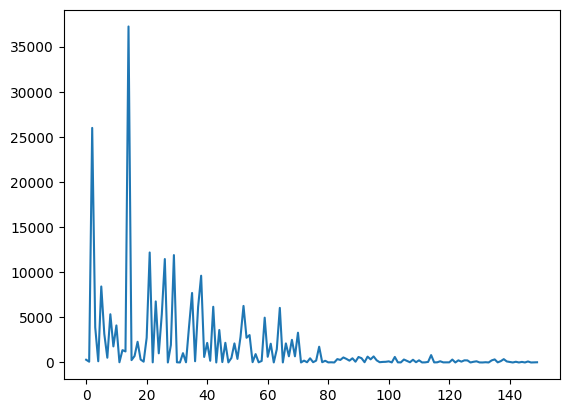

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses[:150])

**2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск**

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [ ]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2) # <реализовать логику MSE>

    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0] # df/dy^

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.n_inputs = n_inputs
        self.weights = torch.randn(1, n_inputs).T
        self.bias = torch.randn(1)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.bias # <реализовать логику нейрона>

    def backward(self, dvalue):
        # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
        self.dinputs = torch.matmul(dvalue, self.weights.T)
        self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
        self.dbias = torch.sum(dvalue) # df/db

2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1 # скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []

for epoch in range(100):
    # forward pass
    y_pred = neuron.forward(X) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

losses[::20]

[tensor(8083.8057),
 tensor(7.6999),
 tensor(0.0117),
 tensor(1.8110e-05),
 tensor(2.8288e-08)]

**2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__**

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.n_features = n_features
        self.n_neurons = n_neurons
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [ ]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.1  #  скорость обучения
n_epoch = 100  #  количество эпох

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

losses[::20]

[tensor(8268.0234),
 tensor(8.2624),
 tensor(0.0126),
 tensor(1.9422e-05),
 tensor(3.0695e-08)]

**2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.**

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [ ]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output

    def backward(self, dvalues):
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0

In [ ]:
# создание компонентов сети
fc1 = Linear(1, 30) # Первый полносвязный слой с 10 нейронами
relu1 = Activation_ReLU()
fc2 = Linear(30, 1) # второй с 1 нейроном

loss = MSELoss()
lr = 0.02

ys = [] # хранение предсказаний на каждой эпохе
for epoch in range(4001):
    # <forward pass>
    # fc1 > relu1 > fc2 > loss
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

    data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(y_pred)

    # <backprop> вычисление градиентов
    # loss > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    # <шаг оптимизации для fc1> весов и смещений
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases

    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 22.217174530029297
epoch 200 mean loss 0.007735392078757286
epoch 400 mean loss 0.005290290806442499
epoch 600 mean loss 0.0043725986033678055
epoch 800 mean loss 0.003972725477069616
epoch 1000 mean loss 0.003798064077273011
epoch 1200 mean loss 0.003696874948218465
epoch 1400 mean loss 0.0036350826267153025
epoch 1600 mean loss 0.0035784875508397818
epoch 1800 mean loss 0.0035233499947935343
epoch 2000 mean loss 0.00341854989528656
epoch 2200 mean loss 0.0033237547613680363
epoch 2400 mean loss 0.003265978768467903
epoch 2600 mean loss 0.0032332062255591154
epoch 2800 mean loss 0.00321215926669538
epoch 3000 mean loss 0.0032016318291425705
epoch 3200 mean loss 0.0031883111223578453
epoch 3400 mean loss 0.0031784535385668278
epoch 3600 mean loss 0.0031714458018541336
epoch 3800 mean loss 0.003166226437315345
epoch 4000 mean loss 0.0031622489914298058


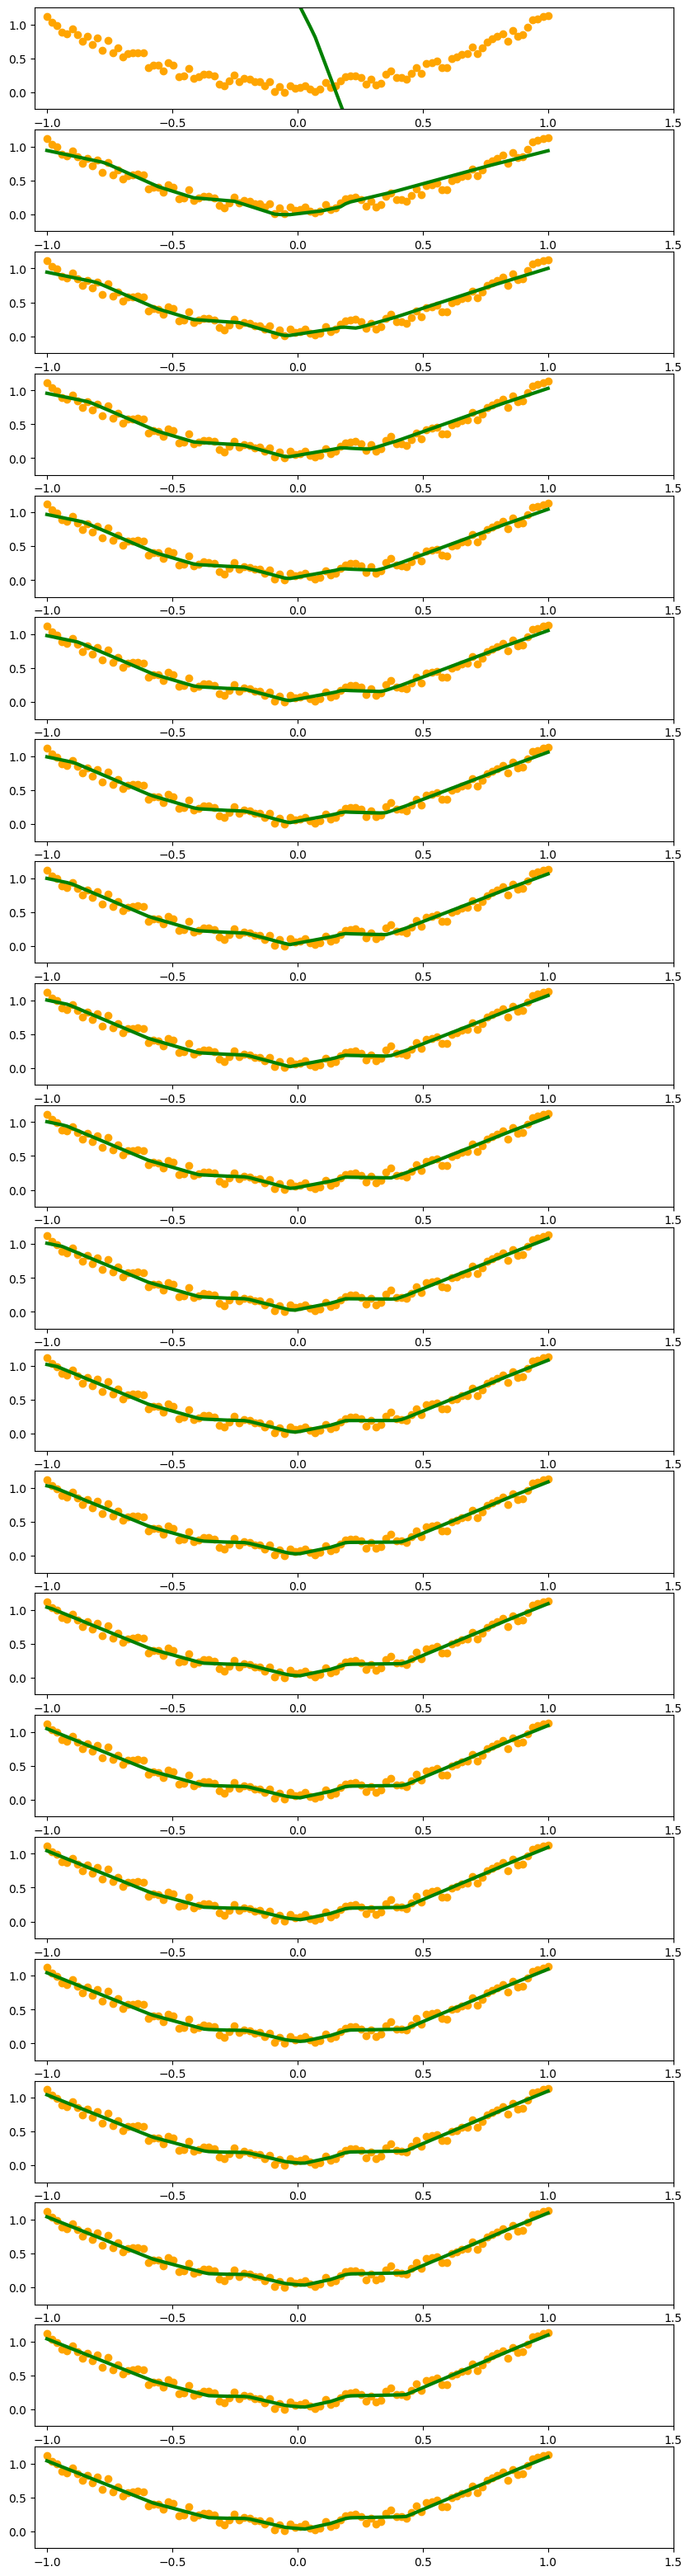

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)

In [ ]:
X.size(), y.size()

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 30)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(30, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
model = SimpleNN()

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)

ys = []
for epoch in range(4001):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 200 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')
        ys.append(y_pred.detach())

Epoch 0, Loss: 0.6847288608551025
Epoch 200, Loss: 0.04557766765356064
Epoch 400, Loss: 0.019449427723884583
Epoch 600, Loss: 0.009872074238955975
Epoch 800, Loss: 0.007128259167075157
Epoch 1000, Loss: 0.006292331963777542
Epoch 1200, Loss: 0.005896108224987984
Epoch 1400, Loss: 0.005609277635812759
Epoch 1600, Loss: 0.0053646862506866455
Epoch 1800, Loss: 0.005147975869476795
Epoch 2000, Loss: 0.0049595613963902
Epoch 2200, Loss: 0.0047909910790622234
Epoch 2400, Loss: 0.004622051026672125
Epoch 2600, Loss: 0.004474962130188942
Epoch 2800, Loss: 0.004340249579399824
Epoch 3000, Loss: 0.004210885148495436
Epoch 3200, Loss: 0.004094449803233147
Epoch 3400, Loss: 0.004000517074018717
Epoch 3600, Loss: 0.003918564412742853
Epoch 3800, Loss: 0.0038525485433638096
Epoch 4000, Loss: 0.003800002858042717


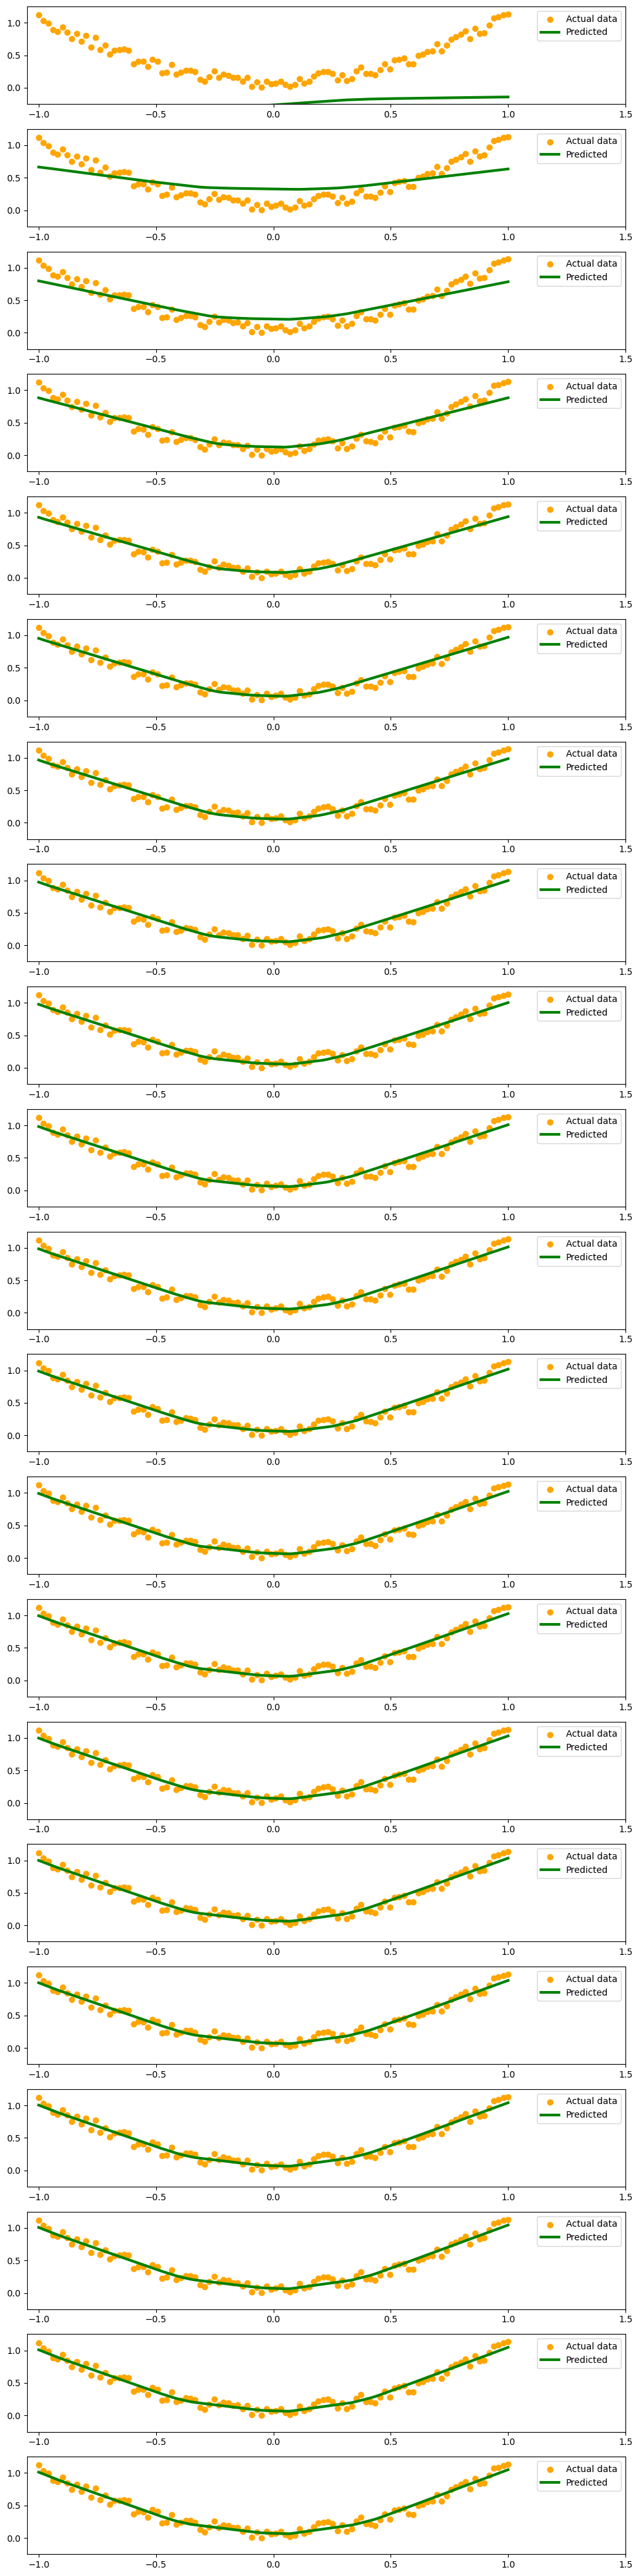

In [ ]:
fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))

for ax, y_ in zip(axs, ys):
    ax.scatter(X.numpy(), y.numpy(), color="orange", label='Actual data')

    ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3, label='Predicted')

    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.legend()

plt.tight_layout()
plt.show()